General Analysis of Game Sales from 1980 to 2016

In this notebook we are going to do some data analysis on a dataset containning data of game sales from different regions. I am going to look at the total sales in different regions and look at how different platforms performed along with what different things affect sales. For example does a user or critic review affect sales? What is the most popular system? Most popular game type? By the end we should have a good idea of the top system and genre overall. 

In [1]:
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
df= pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Looking at the info above we can see that there are quite a few categories that are missing some data. Well look more into that coming up later. I also see that we can change the year of release to an int64 instead of a flot64 because a game wont be released part of a year. We can also change user score from an object to a float64 so we can do some math with the numbers later on. I am also going to convert all of the column names to lowercase. This will make it easier to work with as we move forward with the data. The 2 in the name and genre columns im not going to worry about after examinging the data. They are both missing alot of infomation and they are old GEN game from the early 90s that would have a neglible affect on analysis. 

In [5]:
df.duplicated().sum()

0

As we can see above it looks like we have no duplicate rows in this dataframe!

In [6]:
df.columns = df.columns.str.lower()
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Above we converted all the column names to lowercase to be able to access them easier later and for overall easier readability

In [7]:
df['year_of_release'].fillna(df.groupby('platform')['year_of_release'].transform('min'), inplace=True)
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y', errors='coerce')
df['year_of_release'].head()


0   2006-01-01
1   1985-01-01
2   2008-01-01
3   2009-01-01
4   1996-01-01
Name: year_of_release, dtype: datetime64[ns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16715 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


I choose to fill the missing values of the year_of_release column with the min value of each platform. This will act as a placeholder for we dont know the actual release date. This way when i go to group data later i can have a group that doesnt have a release date that way i dont skew the data of other release years. I also converted it to data time so i can wor with the data as years instead of numbers


In [9]:
# Replace 'tbd' with NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)
print(df['user_score'].isnull().sum())
# Convert the column to float, filling non-numeric values with NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Calculate the mean, ignoring NaN values
#mean_user_score = df['user_score'].mean(skipna=True)

# Replace 'tbd' with NaN
#['user_score'] = df['user_score'].replace('tbd', mean_user_score)

# Fill NaN values with the mean of the column
#df['user_score'].fillna(mean_user_score, inplace=True)

# Remove rows with NaN values in 'user_score' column
df = df.dropna(subset=['user_score'])

# Check if there are any remaining NaN or 'TBD' values
print(df['user_score'].isnull().sum())  # Should print 0
print((df['user_score'] == 'tbd').sum())  # Should print 0

9125
0
0


Above i changed the user_score column from dtype object to dtype float64 to be able to work with the numbers. I have removed the NaN values. I did this because even tho there was a lot of values that were NaN after reviewing the data in the csv file i noticed that alot of the missing values were from older systems that dont have much if any relevance to the time periods that i will be looking at. 

In [10]:
# Count the number of missing values in the 'critic_score' column
missing_values = df['critic_score'].isnull().sum()
print(f"Number of missing values in 'critic_score' column: {missing_values}")

# Remove rows with missing values in the 'critic_score' column
df = df.dropna(subset=['critic_score'])

# Verify that the missing values have been removed
new_missing_values = df['critic_score'].isnull().sum()
print(f"Number of missing values in 'critic_score' column after removal: {new_missing_values}")

Number of missing values in 'critic_score' column: 573
Number of missing values in 'critic_score' column after removal: 0


Above i changed the critic_score column from dtype object to dtype float64 to be able to work with the numbers. I have removed the NaN values because compared to the size of the overall data the 573 that are missing shouldnt have a large impact.

In [11]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Above I added a total sales column that gives you the total sales from all the regions including other

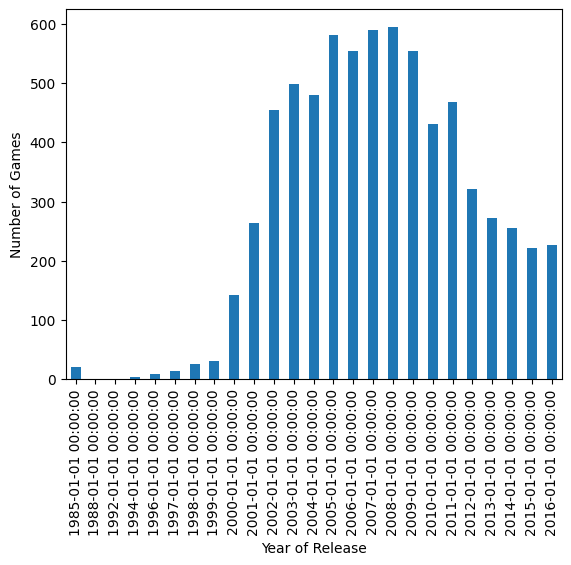

In [12]:
year_counts = df['year_of_release'].value_counts().sort_index()
if not year_counts.empty:
    year_counts.plot(kind='bar')
    plt.xlabel('Year of Release')
    plt.ylabel('Number of Games')
else:
    print("No valid years to plot.")

As we can see in the chart above the number of games released has a significant increase starting in the early 2000s and peaks in the late 2000s around 2008 - 2009. Before the 2000s, the number of games released each year was significantly lower.

In [13]:
platform_sales = df.groupby('platform')['total_sales'].sum().reset_index()
platform_sales.sort_values('total_sales', ascending=False).head(5)

,platform,total_sales
7,PS2,962.42
14,X360,863.39
8,PS3,792.95
12,Wii,672.84
2,DS,383.87


Above I have identified the top 5 performing platforms. We can see that the PS2 outperforms the other systems by a pretty good margin.

<Figure size 1000x600 with 0 Axes>

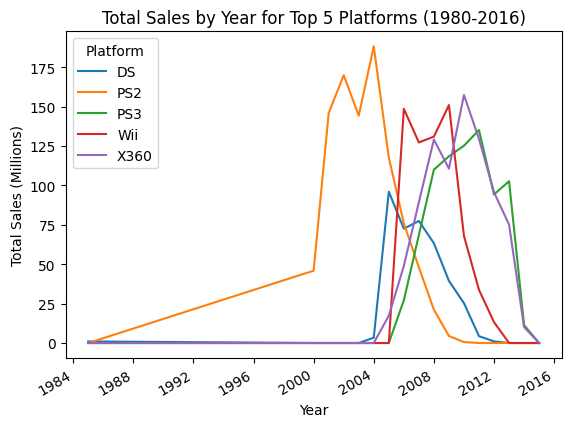

In [14]:
# Get the top 5 platforms with the greatest total sales
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

top_platforms_df = df[(df['platform'].isin(top_platforms)) & (df['year_of_release'] >= pd.to_datetime(1980, format='%Y')) & (df['year_of_release'] <= pd.to_datetime(2017, format='%Y'))]



# Filter the data to only include the top 5 platforms and years between 1980 and 2016


# Group the data by year and platform, and calculate the total sales for each year and platform
yearly_platform_sales = top_platforms_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Pivot the data to create a separate column for each platform
pivoted_data = yearly_platform_sales.pivot(index='year_of_release', columns='platform', values='total_sales')

# Fill missing values with 0 (in case a platform didn't have any sales in a particular year)
pivoted_data = pivoted_data.fillna(0)

# Plot the distribution of total sales by year for each platform
plt.figure(figsize=(10, 6))
pivoted_data.plot(kind='line')
plt.title('Total Sales by Year for Top 5 Platforms (1980-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform')
plt.show()

We can see the distrobution a little better in this graph. It is slightly decieving because for the PS2 for example didnt come out until 2000 tho the graph makes it look like we had some sales before then. We will have to keep that in mind. Also looking at this chart we can see that it looks like most platforms have about a 10 year span before they fade out to zero. Also around 2004 you see the steady decline of the PS2 but a growth of the other 4 systems with the wii peaking almost as high as the PS2.

In [15]:
# Filter data to only include years between 2010 and 2015
df_filtered = df[(df['year_of_release'].dt.year >= 2014) & (df['year_of_release'].dt.year <= 2016)]

# Calculate the lifespan of each platform (from first appearance to last appearance)
platform_lifespans = df_filtered.groupby('platform')['year_of_release'].agg(['min', 'max']).apply(lambda x: x['max'] - x['min'], axis=1)

# Calculate the time it takes for new platforms to appear (from last appearance of previous platform to first appearance of new platform)
new_platform_intervals = df_filtered.groupby('platform')['year_of_release'].min().sort_values().diff()

# Calculate the time it takes for old platforms to fade (from last appearance to zero sales)
old_platform_intervals = df_filtered.groupby('platform')['year_of_release'].max().loc[lambda x: x.dt.year < 2015].sort_values().diff()

print("Average lifespan of a platform:", platform_lifespans.mean())
print("Average time for new platforms to appear:", new_platform_intervals.mean())
print("Average time for old platforms to fade:", old_platform_intervals.mean())

Average lifespan of a platform: 593 days 03:00:00
Average time for new platforms to appear: 0 days 00:00:00
Average time for old platforms to fade: NaT


The above statements seem to correlate with the graph above it. It also looks judging by the graph that the most significant sales data would come from abut 2014 to 2016. This seems to be the most relevant period for data because even tho the PS2 had dropped off by then the next gen PS3 came out. This gives a better picture for trying to predict for 2017.

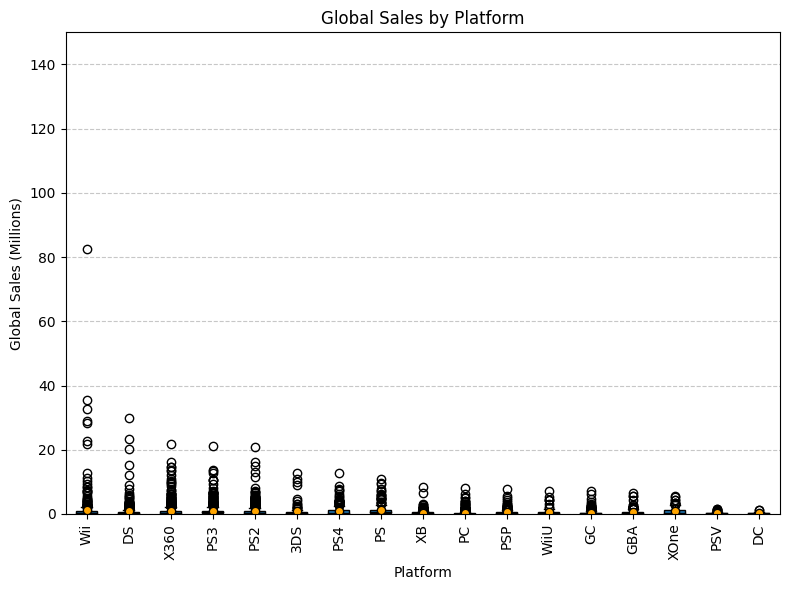

In [16]:
plt.figure(figsize=(8, 6))
platforms = df['platform'].unique()  # Define platforms as a list of unique platform names
boxplots = [df.loc[df['platform'] == platform, 'total_sales'] for platform in platforms]
plt.boxplot(boxplots, vert=True, patch_artist=True, showmeans=True, 
            medianprops={'color': 'black'}, 
            meanprops={'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'orange'})

# Set the labels and title
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Global Sales by Platform')

# Rotate the x-axis labels
plt.xticks(range(1, len(platforms) + 1), platforms, rotation=90, ha='center')

# Set the y-axis limits
plt.ylim(0, 150)

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

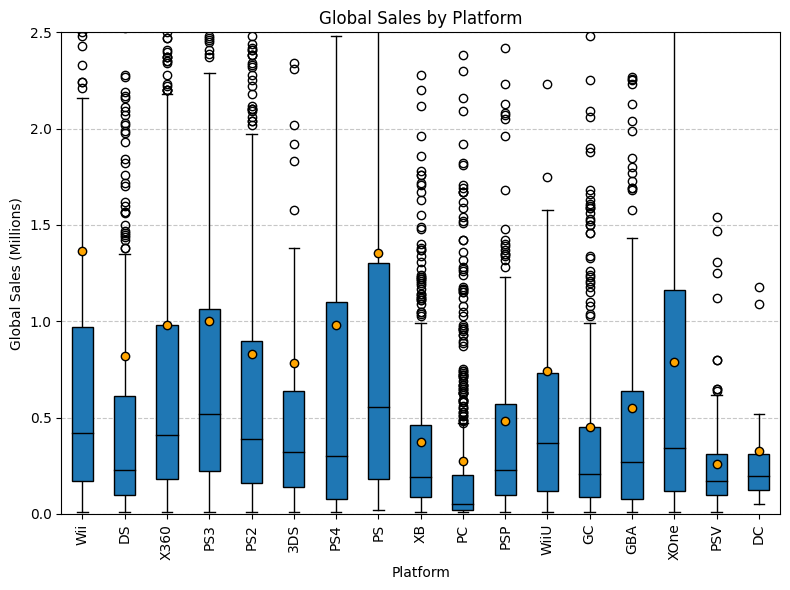

In [17]:

# Define platforms as a list of unique platform names
platforms = df['platform'].unique()

# Create boxplot data
boxplots = [df.loc[df['platform'] == platform, 'total_sales'] for platform in platforms]

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(boxplots, vert=True, patch_artist=True, showmeans=True, 
            medianprops={'color': 'black'}, 
            meanprops={'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'orange'})

# Set labels and title
plt.xlabel('Platform')
plt.ylabel('Global Sales (Millions)')
plt.title('Global Sales by Platform')

# Rotate x-axis labels
plt.xticks(range(1, len(platforms) + 1), platforms, rotation=90, ha='center')

# Adjust y-axis limits
plt.ylim(0, 2.5)  # Focus on the lower range of sales

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
average_sales = df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
average_sales

platform
Wii     1.367561
PS      1.354936
PS3     1.003734
PS4     0.981004
X360    0.980011
PS2     0.828958
DS      0.818486
XOne    0.789152
3DS     0.784747
WiiU    0.742472
GBA     0.549917
PSP     0.483893
GC      0.451124
XB      0.373821
DC      0.325000
PC      0.275320
PSV     0.261261
Name: total_sales, dtype: float64

Ive created a box plot that shows the global sales of all games, broken down by platform. This boxplot shows the distribution of global video game sales by platform. The graph indicates that the Wii, NES, and DS are the top 3 platforms with the highest sales. The other platforms have significantly lower sales, suggesting they were less popular or had a shorter lifespan in the market.

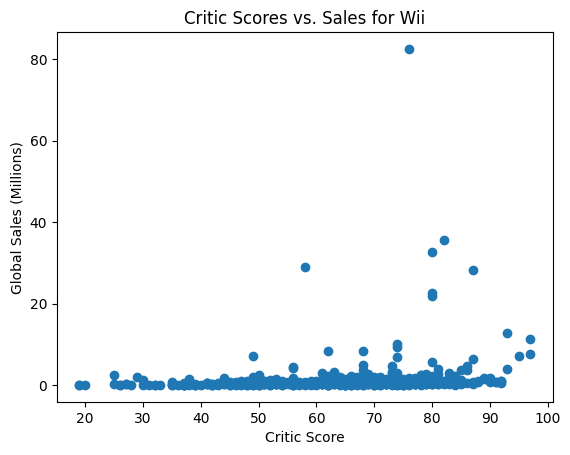

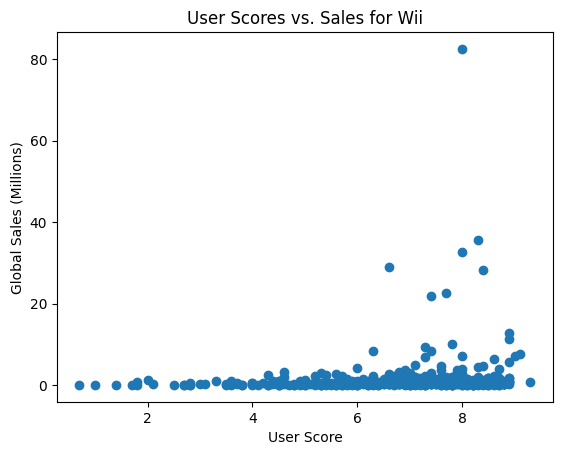

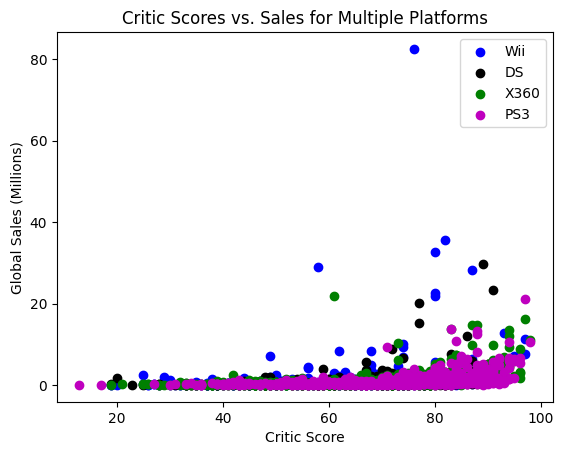

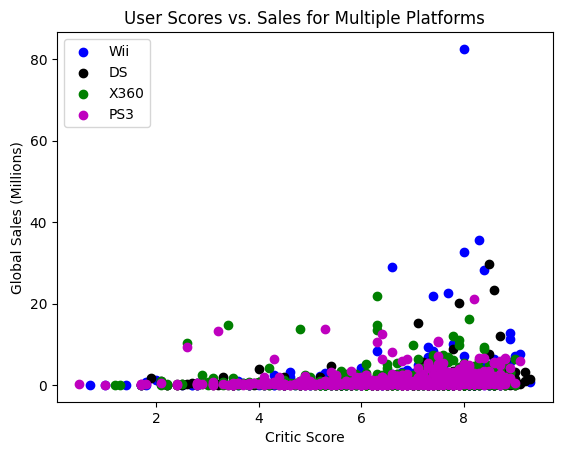

In [19]:
# Filter data for Wii platform
wii_data = df[df['platform'] == 'Wii']

# Scatter plot of critic scores vs. sales
plt.scatter(wii_data['critic_score'], wii_data['total_sales'])
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Millions)')
plt.title('Critic Scores vs. Sales for Wii')
plt.show()

# Scatter plot of user scores vs. sales
plt.scatter(wii_data['user_score'], wii_data['total_sales'])
plt.xlabel('User Score')
plt.ylabel('Global Sales (Millions)')
plt.title('User Scores vs. Sales for Wii')
plt.show()

# Filter data for multiple platforms
platforms = ['Wii', 'DS', 'X360', 'PS3']
data = df[df['platform'].isin(platforms)]

# Scatter plot of critic scores vs. sales for multiple platforms
colors = {'Wii': 'b', 'DS': 'k', 'X360': 'g', 'PS3' : 'm'}
for platform in platforms:
    plt.scatter(data[data['platform'] == platform]['critic_score'], data[data['platform'] == platform]['total_sales'], label=platform, c=colors[platform])

plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Millions)')
plt.title('Critic Scores vs. Sales for Multiple Platforms')
plt.legend()
plt.show()


# Filter data for multiple platforms
platforms = ['Wii', 'DS', 'X360', 'PS3']
data = df[df['platform'].isin(platforms)]

# Scatter plot of critic scores vs. sales for multiple platforms
colors = {'Wii': 'b', 'DS': 'k', 'X360': 'g', 'PS3' : 'm'}
for platform in platforms:
    plt.scatter(data[data['platform'] == platform]['user_score'], data[data['platform'] == platform]['total_sales'], label=platform, c=colors[platform])

plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Millions)')
plt.title('User Scores vs. Sales for Multiple Platforms')
plt.legend()
plt.show()

In [20]:
critic_corr = wii_data['critic_score'].corr(wii_data['total_sales'])
print(f'Critic Score vs. Sales Correlation: {critic_corr:.2f}')

user_corr = wii_data['user_score'].corr(wii_data['total_sales'])
print(f'User Score vs. Sales Correlation: {user_corr:.2f}')

Critic Score vs. Sales Correlation: 0.17
User Score vs. Sales Correlation: 0.11


In [21]:
# Calculate correlation between critic scores and sales across multiple platforms
critic_corr_all = df['critic_score'].corr(df['total_sales'])
print(f'Critic Score vs. Sales Correlation (All Platforms): {critic_corr_all:.2f}')

# Calculate correlation between user scores and sales across multiple platforms
user_corr_all = df['user_score'].corr(df['total_sales'])
print(f'User Score vs. Sales Correlation (All Platforms): {user_corr_all:.2f}')

# Calculate correlation between critic scores and sales for each platform
platforms = df['platform'].unique()
for platform in platforms:
    platform_data = df[df['platform'] == platform]
    critic_corr_platform = platform_data['critic_score'].corr(platform_data['total_sales'])
    user_corr_platform = platform_data['user_score'].corr(platform_data['total_sales'])
    print(f'\nPlatform: {platform}')
    print(f'Critic Score vs. Sales Correlation: {critic_corr_platform:.2f}')
    print(f'User Score vs. Sales Correlation: {user_corr_platform:.2f}')

Critic Score vs. Sales Correlation (All Platforms): 0.24
User Score vs. Sales Correlation (All Platforms): 0.09

Platform: Wii
Critic Score vs. Sales Correlation: 0.17
User Score vs. Sales Correlation: 0.11

Platform: DS
Critic Score vs. Sales Correlation: 0.23
User Score vs. Sales Correlation: 0.14

Platform: X360
Critic Score vs. Sales Correlation: 0.39
User Score vs. Sales Correlation: 0.11

Platform: PS3
Critic Score vs. Sales Correlation: 0.43
User Score vs. Sales Correlation: 0.14

Platform: PS2
Critic Score vs. Sales Correlation: 0.39
User Score vs. Sales Correlation: 0.17

Platform: 3DS
Critic Score vs. Sales Correlation: 0.34
User Score vs. Sales Correlation: 0.23

Platform: PS4
Critic Score vs. Sales Correlation: 0.41
User Score vs. Sales Correlation: -0.03

Platform: PS
Critic Score vs. Sales Correlation: 0.43
User Score vs. Sales Correlation: 0.30

Platform: XB
Critic Score vs. Sales Correlation: 0.37
User Score vs. Sales Correlation: 0.18

Platform: PC
Critic Score vs. Sal

We can see that we have a moderate positive correlatiion in the critic score vs sales across all platforms which shows that the critic score has some impact on sales overall. We can also see that we have a weak positive correlation in the user score vs sales across all platforms, this shows that user score may have a small impact to sales. I also take note that on the newer systems have a higher positive correlation to critic score vs sales. The user score is almost always smaller then the critic score correlation and in some cases the user score has a negitive correlation showing that it could possibly be negitivily affecting sales. THis is especially the case in the two newst systems the PS4 and XOne.

In [22]:
genre_sales=df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1226.08
Sports           852.12
Shooter          824.09
Role-Playing     504.33
Racing           482.51
Misc             425.36
Platform         378.63
Fighting         250.97
Simulation       205.06
Adventure         81.57
Puzzle            79.22
Strategy          71.13
Name: total_sales, dtype: float64

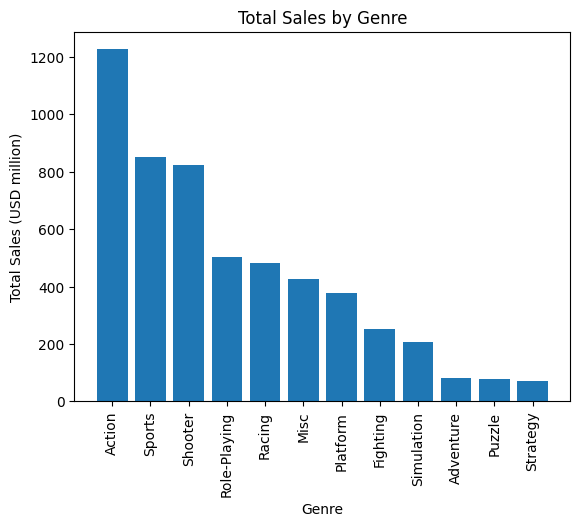

In [23]:
plt.bar(genre_sales.index, genre_sales.values)
plt.xlabel('Genre')
plt.xticks(rotation=90, ha='center')
plt.ylabel('Total Sales (USD million)')
plt.title('Total Sales by Genre')
plt.show()

The above data shows the most profitable genres. The top three look to be Action, Sports, and Shooter. The chart shows a nice visual where we can see.

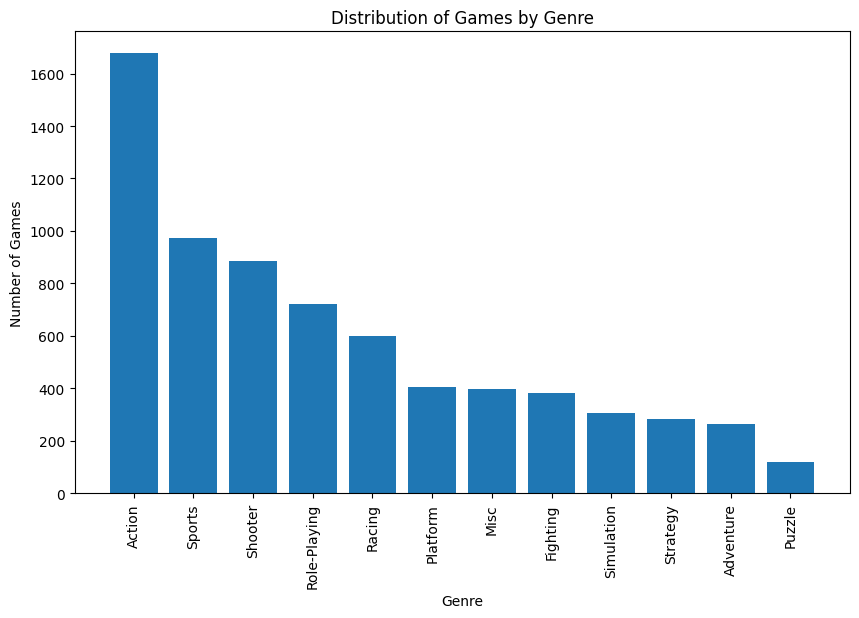

In [24]:
genre_counts = df['genre'].value_counts()

# Plot the distribution of games by genre
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Distribution of Games by Genre')
plt.show()

The above graph shows the number of games that are in each genre. We can see that Action, Sports, and Misc have the most amount of games in those genres. Interesing when you compare to the sales graph that shooter has the 5th most game but has the 3rd most sales. 

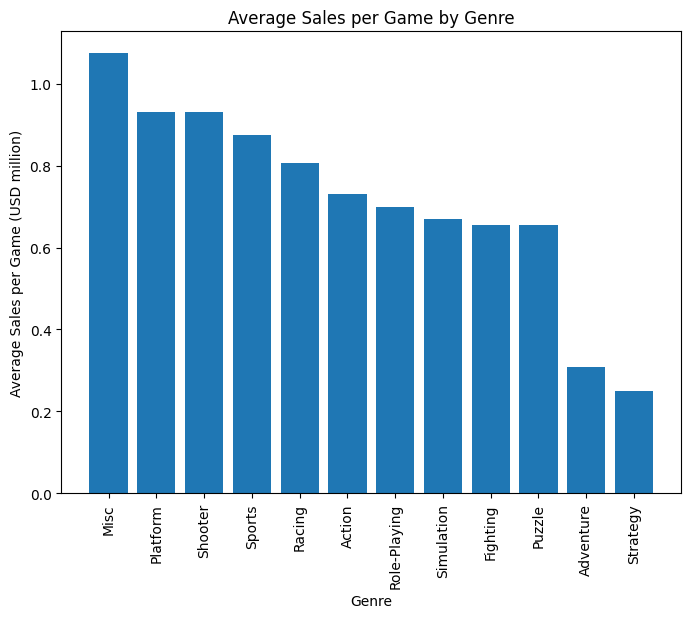

In [25]:
genre_avg_sales = df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Plot the average sales per game for each genre
plt.figure(figsize=(8, 6))
plt.bar(genre_avg_sales.index, genre_avg_sales.values)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Genre')
plt.ylabel('Average Sales per Game (USD million)')
plt.title('Average Sales per Game by Genre')
plt.show()

The chart above shows the average sales per game by genre. We can see that our top 3 is Platform, Shooter, and Role Playing. Once again we have a different top three then our total sales. We cant say for sure but we could make the assumption that if genres like platform and role playing had more games they could take over for top sales due to the fact that they both have higher average sales per game but less total games then the top three. We can also see that on the low side of everything is puzzle and strategy. They have low average sales and low amount of games which looks to equal total sales.

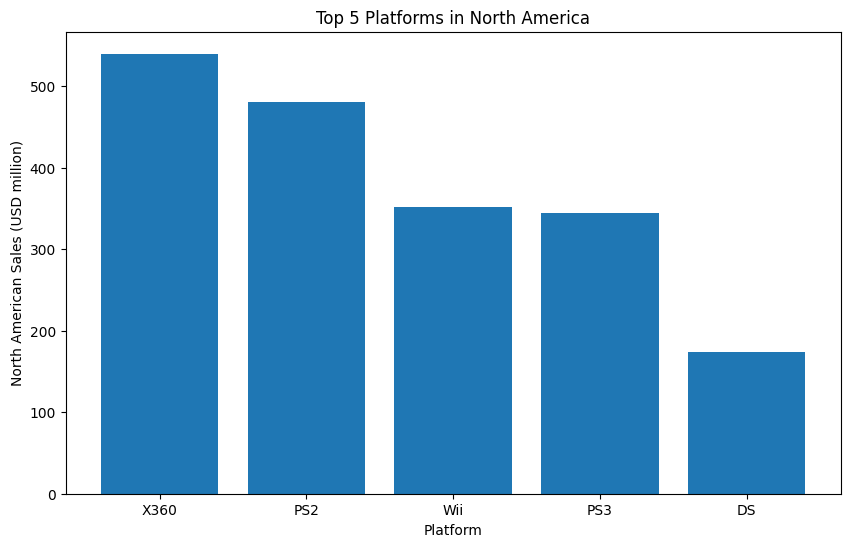

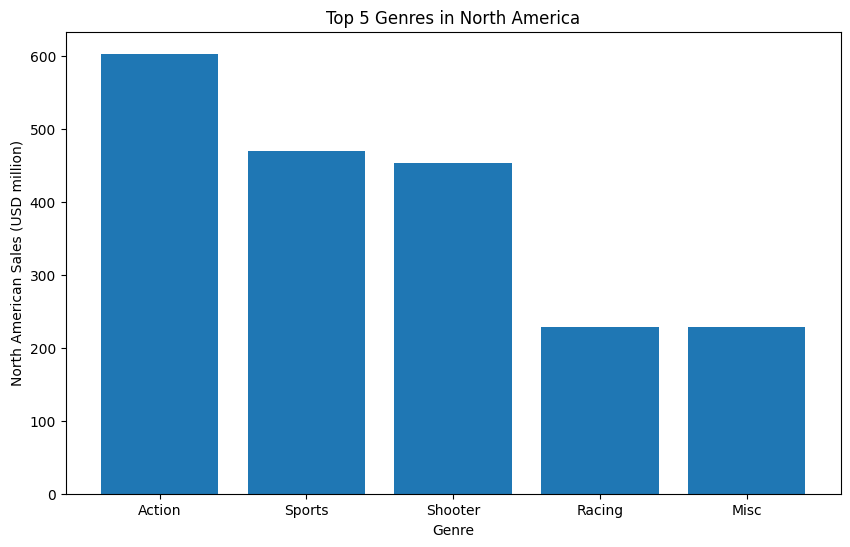

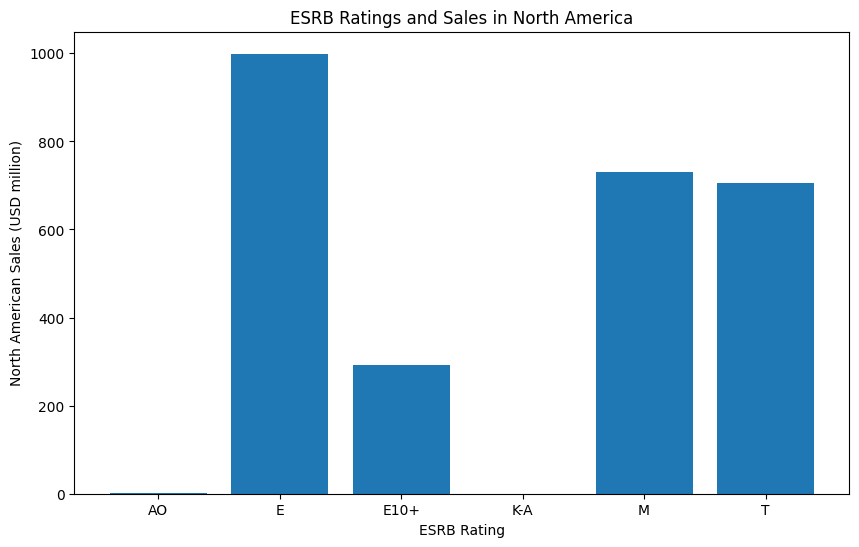

M vs E:  Ttest_indResult(statistic=0.6789931830557877, pvalue=0.4971861349204888)


In [26]:
# Top 5 Platforms in NA
platform_sales = df[df['na_sales'] > 0].groupby('platform')['na_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms.index, top_platforms.values)
plt.xlabel('Platform')
plt.ylabel('North American Sales (USD million)')
plt.title('Top 5 Platforms in North America')
plt.show()

# Top 5 Genres in NA
genre_sales = df[df['na_sales'] > 0].groupby('genre')['na_sales'].sum().sort_values(ascending=False)
top_genres = genre_sales.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values)
plt.xlabel('Genre')
plt.ylabel('North American Sales (USD million)')
plt.title('Top 5 Genres in North America')
plt.show()

# ESRB Ratings and Sales in NA
esrb_sales = df[df['na_sales'] > 0].groupby('rating')['na_sales'].sum()

plt.figure(figsize=(10, 6))
plt.bar(esrb_sales.index, esrb_sales.values)
plt.xlabel('ESRB Rating')
plt.ylabel('North American Sales (USD million)')
plt.title('ESRB Ratings and Sales in North America')
plt.show()

# Check if ESRB ratings affect sales in NA
na_esrb_m = df[df['rating'] == 'M']['na_sales']
na_esrb_e = df[df['rating'] == 'E']['na_sales']

print("M vs E: ", ttest_ind(na_esrb_m, na_esrb_e))

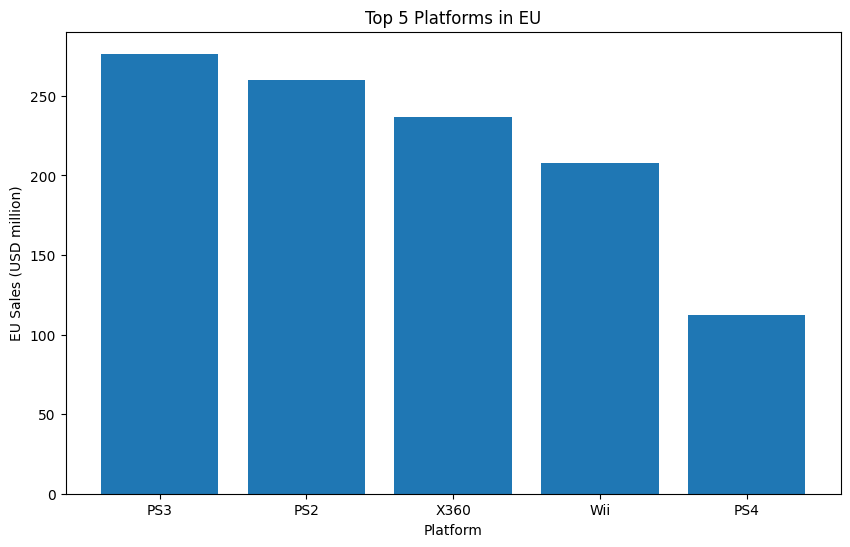

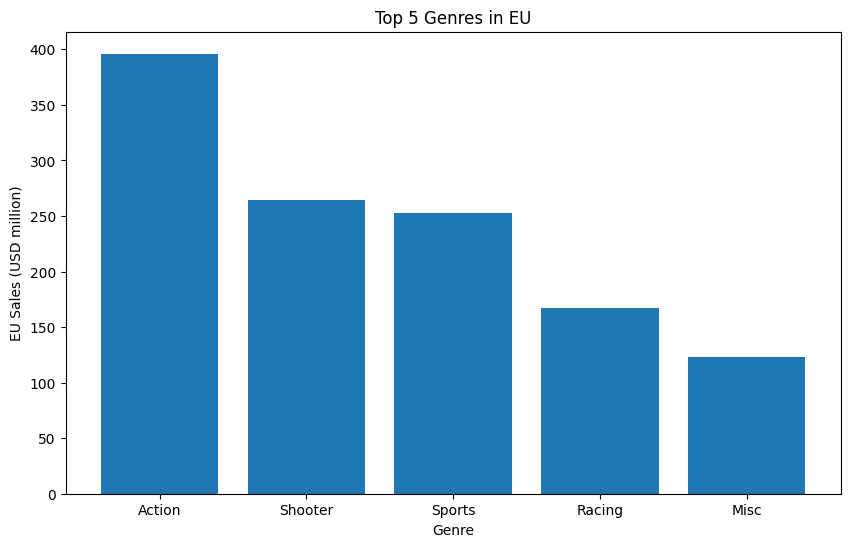

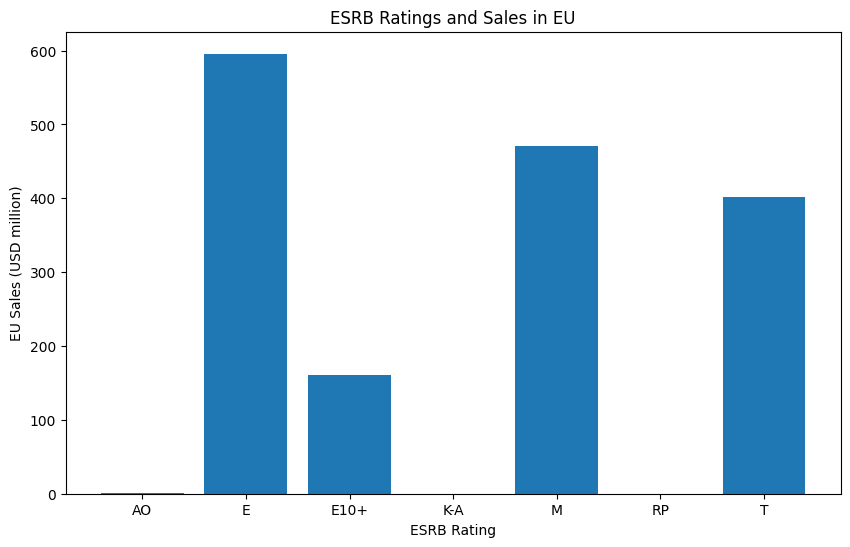

M vs E:  Ttest_indResult(statistic=1.3811133170807324, pvalue=0.1673304425911964)


In [27]:
# Top 5 Platforms in NA
platform_sales_eu = df[df['eu_sales'] > 0].groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
top_platforms_eu = platform_sales_eu.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms_eu.index, top_platforms_eu.values)
plt.xlabel('Platform')
plt.ylabel('EU Sales (USD million)')
plt.title('Top 5 Platforms in EU')
plt.show()

# Top 5 Genres in NA
genre_sales_eu = df[df['eu_sales'] > 0].groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
top_genres_eu = genre_sales_eu.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_genres_eu.index, top_genres_eu.values)
plt.xlabel('Genre')
plt.ylabel('EU Sales (USD million)')
plt.title('Top 5 Genres in EU')
plt.show()

# ESRB Ratings and Sales in NA
esrb_sales = df[df['eu_sales'] > 0].groupby('rating')['eu_sales'].sum()

plt.figure(figsize=(10, 6))
plt.bar(esrb_sales.index, esrb_sales.values)
plt.xlabel('ESRB Rating')
plt.ylabel('EU Sales (USD million)')
plt.title('ESRB Ratings and Sales in EU')
plt.show()

# Check if ESRB ratings affect sales in NA
eu_esrb_m = df[df['rating'] == 'M']['eu_sales']
eu_esrb_e = df[df['rating'] == 'E']['eu_sales']

print("M vs E: ", ttest_ind(eu_esrb_m, eu_esrb_e))

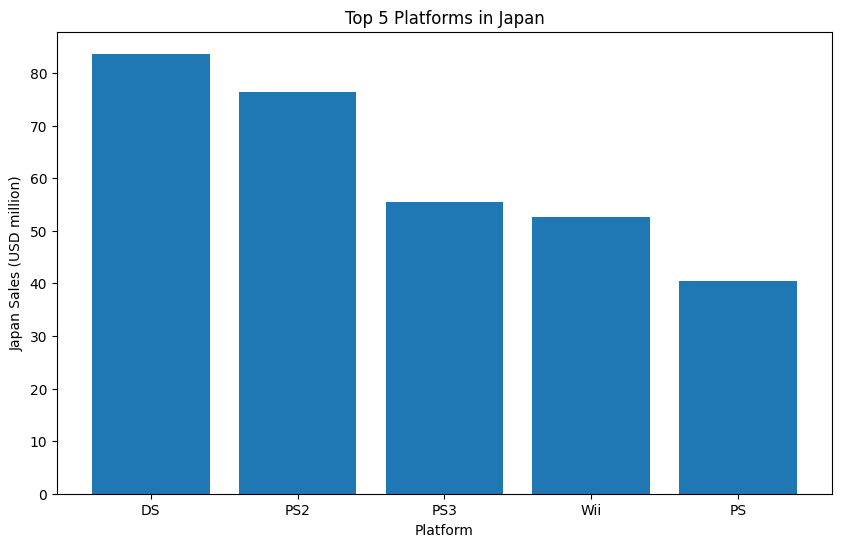

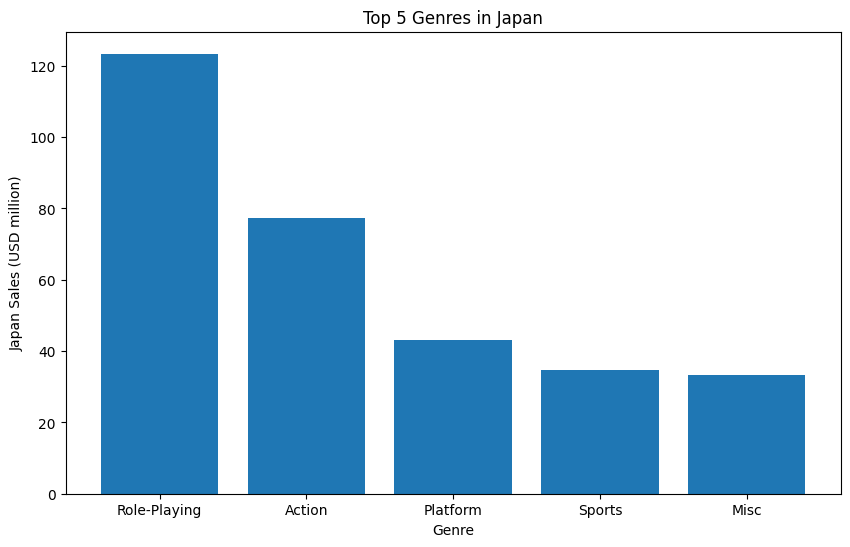

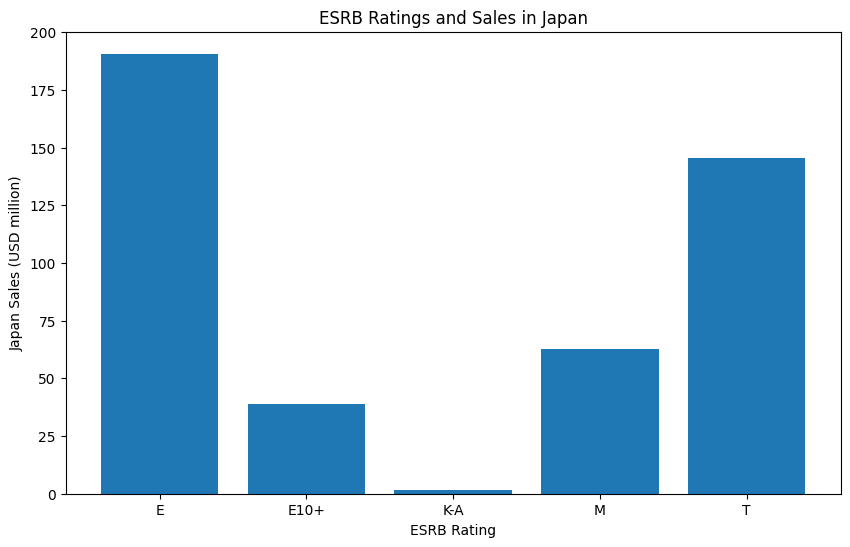

M vs E:  Ttest_indResult(statistic=-4.223296603853403, pvalue=2.467540520699258e-05)


In [28]:
# Top 5 Platforms in NA
platform_sales_jp = df[df['jp_sales'] > 0].groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
top_platforms_jp = platform_sales_jp.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_platforms_jp.index, top_platforms_jp.values)
plt.xlabel('Platform')
plt.ylabel('Japan Sales (USD million)')
plt.title('Top 5 Platforms in Japan')
plt.show()

# Top 5 Genres in NA
genre_sales_jp = df[df['jp_sales'] > 0].groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
top_genres_jp = genre_sales_jp.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_genres_jp.index, top_genres_jp.values)
plt.xlabel('Genre')
plt.ylabel('Japan Sales (USD million)')
plt.title('Top 5 Genres in Japan')
plt.show()

# ESRB Ratings and Sales in NA
esrb_sales_jp = df[df['jp_sales'] > 0].groupby('rating')['jp_sales'].sum()

plt.figure(figsize=(10, 6))
plt.bar(esrb_sales_jp.index, esrb_sales_jp.values)
plt.xlabel('ESRB Rating')
plt.ylabel('Japan Sales (USD million)')
plt.title('ESRB Ratings and Sales in Japan')
plt.show()

# Check if ESRB ratings affect sales in NA
jp_esrb_m = df[df['rating'] == 'M']['jp_sales']
jp_esrb_e = df[df['rating'] == 'E']['jp_sales']

print("M vs E: ", ttest_ind(jp_esrb_m, jp_esrb_e))

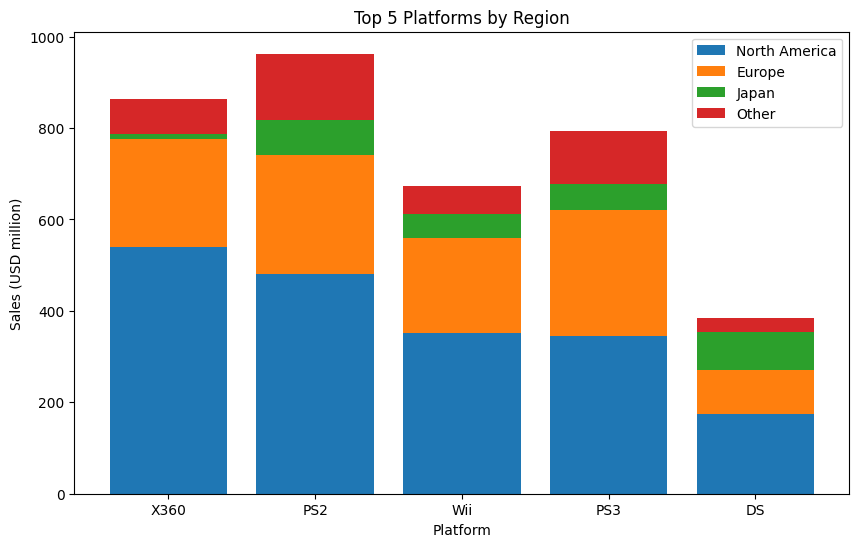

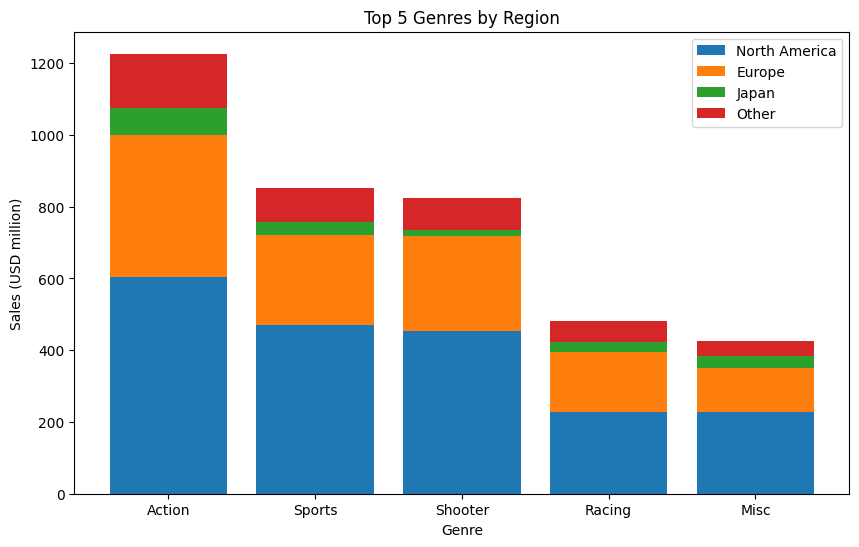

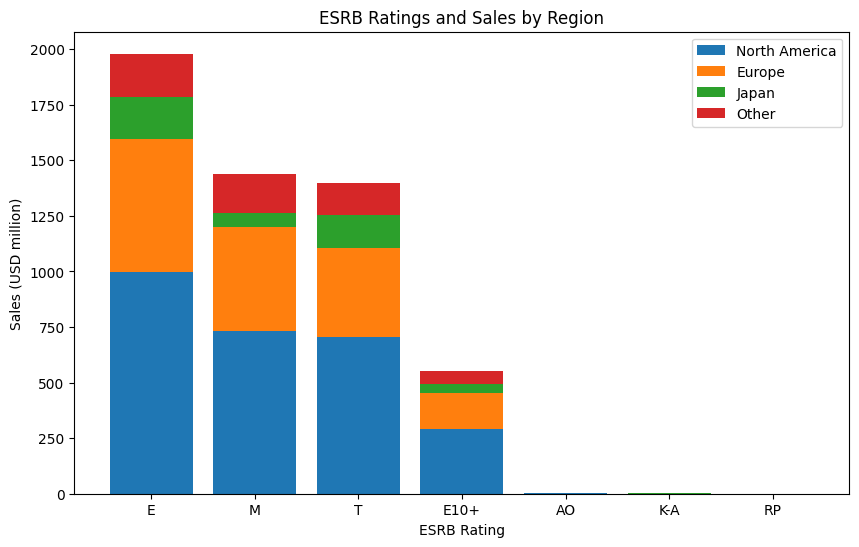

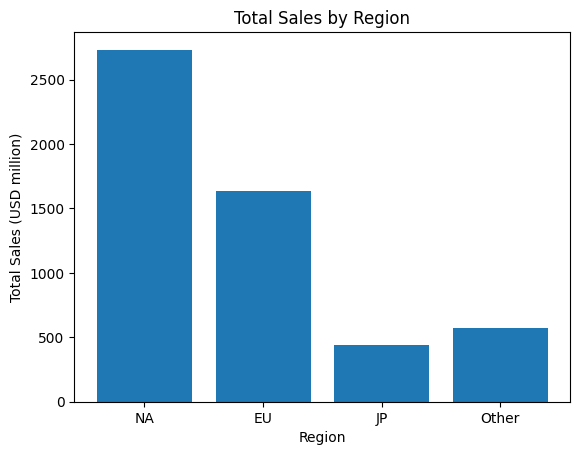

In [29]:
# Top 5 Platforms and their Market Shares by Region
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales.columns = ['na', 'eu', 'jp', 'other']
platform_sales = platform_sales.sort_values(by='na', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(platform_sales.index, platform_sales['na'], label='North America')
plt.bar(platform_sales.index, platform_sales['eu'], bottom=platform_sales['na'], label='Europe')
plt.bar(platform_sales.index, platform_sales['jp'], bottom=platform_sales['na'] + platform_sales['eu'], label='Japan')
plt.bar(platform_sales.index, platform_sales['other'], bottom=platform_sales['na'] + platform_sales['eu'] + platform_sales['jp'], label='Other')
plt.xlabel('Platform')
plt.ylabel('Sales (USD million)')
plt.title('Top 5 Platforms by Region')
plt.legend()
plt.show()

# Top 5 Genres
genre_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
genre_sales.columns = ['na', 'eu', 'jp', 'other']
genre_sales = genre_sales.sort_values(by='na', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(genre_sales.index, genre_sales['na'], label='North America')
plt.bar(genre_sales.index, genre_sales['eu'], bottom=genre_sales['na'], label='Europe')
plt.bar(genre_sales.index, genre_sales['jp'], bottom=genre_sales['na'] + genre_sales['eu'], label='Japan')
plt.bar(genre_sales.index, genre_sales['other'], bottom=genre_sales['na'] + genre_sales['eu'] + genre_sales['jp'], label='Other')
plt.xlabel('Genre')
plt.ylabel('Sales (USD million)')
plt.title('Top 5 Genres by Region')
plt.legend()
plt.show()

# ESRB Ratings and Sales by Region
esrb_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
esrb_sales.columns = ['na', 'eu', 'jp', 'other']
esrb_sales = esrb_sales.sort_values(by='na', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(esrb_sales.index, esrb_sales['na'], label='North America')
plt.bar(esrb_sales.index, esrb_sales['eu'], bottom=esrb_sales['na'], label='Europe')
plt.bar(esrb_sales.index, esrb_sales['jp'], bottom=esrb_sales['na'] + esrb_sales['eu'], label='Japan')
plt.bar(esrb_sales.index, esrb_sales['other'], bottom=esrb_sales['na'] + esrb_sales['eu'] + esrb_sales['jp'], label='Other')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales (USD million)')
plt.title('ESRB Ratings and Sales by Region')
plt.legend()
plt.show()


# Assuming you have a pandas dataframe wit
# Create a figure and axis
fig, ax = plt.subplots()

# Create the bar chart
ax.bar(['NA', 'EU', 'JP', 'Other'], [df['na_sales'].sum(), df['eu_sales'].sum(), df['jp_sales'].sum(), df['other_sales'].sum()])

# Set the title and labels
ax.set_title('Total Sales by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Total Sales (USD million)')

# Show the plot
plt.show()


I created the above graphs to combine all the regions to be able to view them together a little easier. We can see in the first graph that compares the top 5 platforms by market share and their regions.In this graph we can see that the NA region has the highest market share across all platforms with the X360 being the largest and the PS2 a very close second. We can see that overall the PS2 is the most popular platform. The Ps3 also has a pretty even market share between NA and Europe.
In the second graph we can see that the action genre is the most popular genre in every market by a good margin. Shooter genre games in Japan dont seem to do that great. The platform and misc genres are almost even in all markets. 
The last graph shows that in every region E rated games sell the moost with T and M games being farily even in NA but in japan T game sales almost double M games sales. 


In [30]:
# Hypothesis 1: Average user ratings of Xbox One and PC platforms are the same
xbox_one_ratings = df[df['platform'] == 'XOne']['user_score']
pc_ratings = df[df['platform'] == 'PC']['user_score']
#t_stat, p_val = ttest_ind(xbox_one_ratings, pc_ratings)
t_stat, p_val = ttest_ind(xbox_one_ratings, pc_ratings, nan_policy='omit')
print("Hypothesis 1: Average user ratings of Xbox One and PC platforms are the same")
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis: Average user ratings are not the same")
else:
    print("Fail to reject null hypothesis: Average user ratings are the same")


Hypothesis 1: Average user ratings of Xbox One and PC platforms are the same
p-value: 0.00010749396991155507
Reject null hypothesis: Average user ratings are not the same


Null hypothesis (H0): μ_Xbox One = μ_PC (The average user ratings of Xbox One and PC platforms are equal)
Alternative hypothesis (H1): μ_Xbox One ≠ μ_PC (The average user ratings of Xbox One and PC platforms are not equal)

I used p_val < .05 because it is a common value used for hypothosis testing. After running it iniatially i did cahnge the p-val just to see if it made a change to the outcome and it did not. This shows us with 95% confidance that the average user ratings are not the same and its not due to chance. Tho the value is close to the p_val it is still less so we reject the null hypothesis. 

In [31]:
# Hypothesis 2: Average user ratings for Action and Sports genres are different
action_ratings = df[df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = df[df['genre'] == 'Sports']['user_score'].dropna()
t_stat, p_val = ttest_ind(action_ratings, sports_ratings)
print("\nHypothesis 2: Average user ratings for Action and Sports genres are different")
print("p-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis: Average user ratings are different")
else:
    print("Fail to reject null hypothesis: Average user ratings are the same")


Hypothesis 2: Average user ratings for Action and Sports genres are different
p-value: 0.8412827497852923
Fail to reject null hypothesis: Average user ratings are the same


Null hypothesis (H0): μ_Action = μ_Sports (The average user ratings of Action and Sports genres are equal)
Alternative hypothesis (H1): μ_Action ≠ μ_Sports (The average user ratings of Action and Sports genres are not equal)

I used p_val < .05 because it is a common value used for hypothosis testing. After running it iniatially i did cahnge the p-val just to see if it made a change to the outcome and it did not. This outcome shows us that there is no statistically significant difference in how users rate Action games versus Sports games.

General Conclusion:

From this analysis we have been able to find out a lot of things about the data that we recieved. The first thing we notice is that the number of games released has a significant increase starting in the early 2000s and peaks in the late 2000s around 2008 - 2009. Before the 2000s, the number of games released each year was significantly lower. We can also see that the PS2 was the most popular system reaches the highest sales. It had a lifespan of about 10 years. After that the Wii took over the top spot until it dropped off. All of the systems sales do start a downward trend after about 2012. We do know tho that the top perforing systems overall are older systems and are making less to no games as the years go on. Another thing that we found out is that there is a medium positive correlation between critic score and sales. We see that in the next gen systems that correlation is even stronger. This can indicate that a critics score can have an affect on the overall sales of the games. That being said we see a small yet still postive correlation on average for all platforms between the user score and overall sales. We also see that on the next gen systems the user score has a very low positive correclation or at times even a negitive correation telling us that low user scores could negitivaly impact a games sales overall. We see that Everyone rated games make up for most of the total sales. It looks like we would want to find out more information on the 'other' regions because they make up a lot of the total sales of games. We also see that if we want to make more games that make more money we should stick to Action,Sports, and Shooter games overall in all regions they have the most sales. Depending on the region should be how to decided what system to make games for. IF you could make a game that was rated E for the PS2 and was an action games in theory going by the data it would do quite well.  